In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('stocks/AAPL.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5146 entries, 0 to 5145
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5146 non-null   datetime64[ns]
 1   Open       5146 non-null   float64       
 2   High       5146 non-null   float64       
 3   Low        5146 non-null   float64       
 4   Close      5146 non-null   float64       
 5   Volume     5146 non-null   int64         
 6   Symbol     5146 non-null   object        
 7   YTD Gains  5146 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 321.8+ KB
None


In [5]:
print(df.head())

        Date      Open      High       Low     Close     Volume Symbol  \
0 2002-12-31  0.250000  0.256429  0.249107  0.255893  200726400   AAPL   
1 2003-01-02  0.256429  0.266429  0.256250  0.264286  181428800   AAPL   
2 2003-01-03  0.264286  0.266607  0.260536  0.266071  147453600   AAPL   
3 2003-01-06  0.268393  0.274643  0.265714  0.266071  390532800   AAPL   
4 2003-01-07  0.264107  0.267857  0.258393  0.265179  342344800   AAPL   

   YTD Gains  
0   0.000000  
1   0.032799  
2   0.039774  
3   0.039774  
4   0.036289  


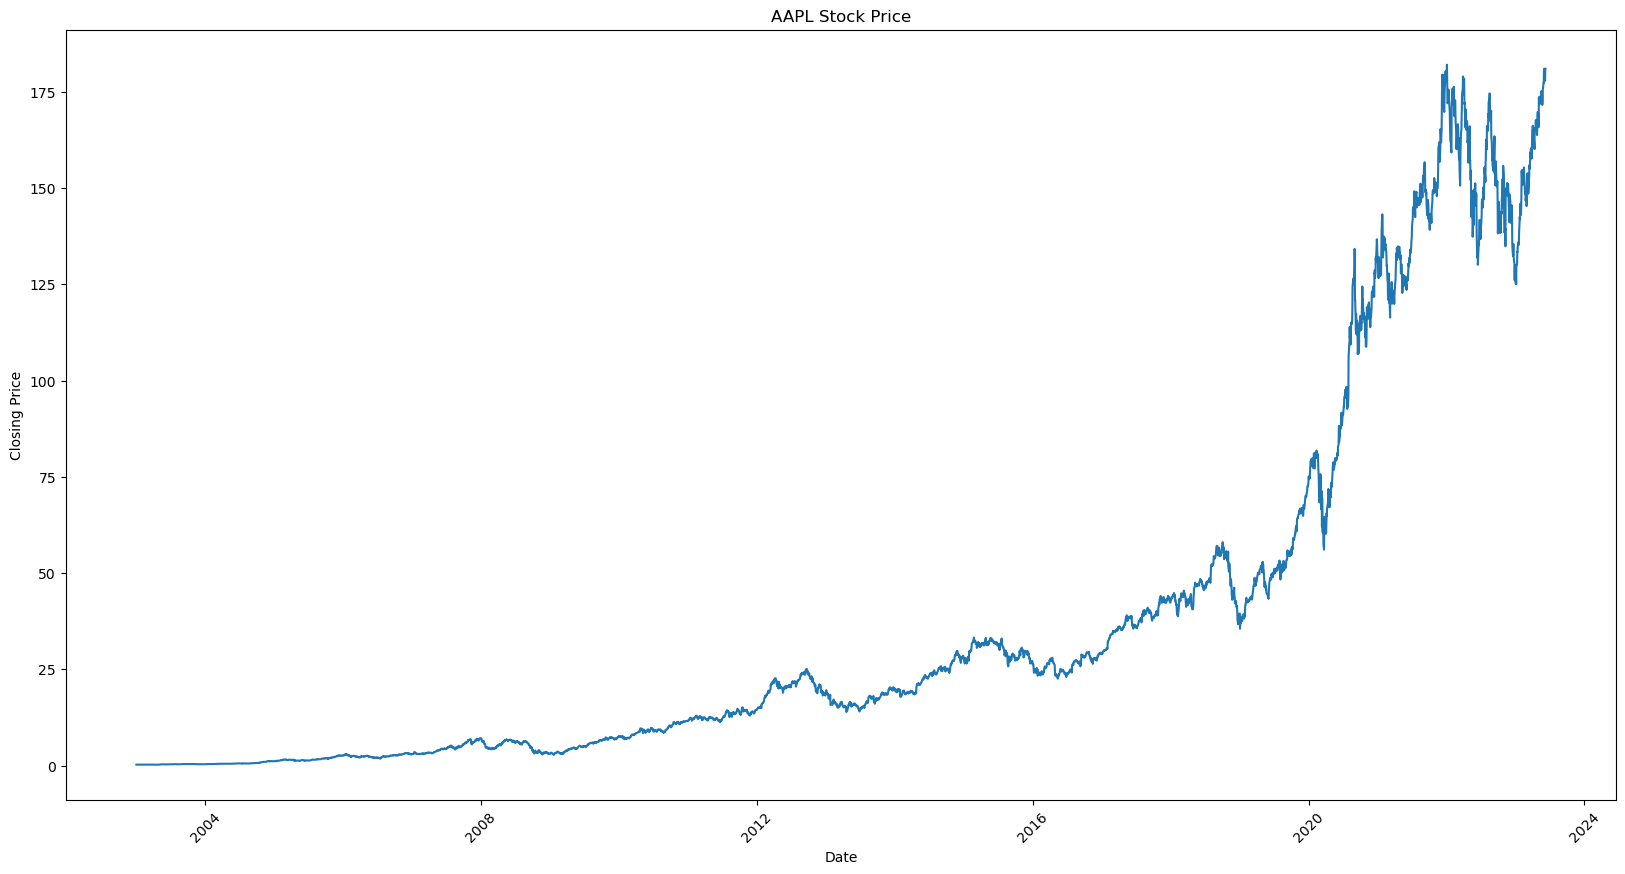

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['Close'])
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

In [7]:
print(df.describe())

                                Date         Open         High          Low  \
count                           5146  5146.000000  5146.000000  5146.000000   
mean   2013-03-20 17:15:55.616012544    36.958733    37.374863    36.556797   
min              2002-12-31 00:00:00     0.231964     0.235536     0.227143   
25%              2008-02-11 06:00:00     4.400982     4.465357     4.325625   
50%              2013-03-21 12:00:00    18.898035    19.045714    18.713572   
75%              2018-04-30 18:00:00    43.299376    43.694375    42.959375   
max              2023-06-09 00:00:00   182.630005   184.949997   180.630005   
std                              NaN    47.625278    48.203756    47.088192   

             Close        Volume    YTD Gains  
count  5146.000000  5.146000e+03  5146.000000  
mean     36.983358  4.106250e+08   143.526655  
min       0.234286  3.519590e+07    -0.084438  
25%       4.391786  1.241327e+08    16.162588  
50%      18.928572  2.786938e+08    72.970653  


In [8]:
df['Daily_Return'] = df['Close'].pct_change()

H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



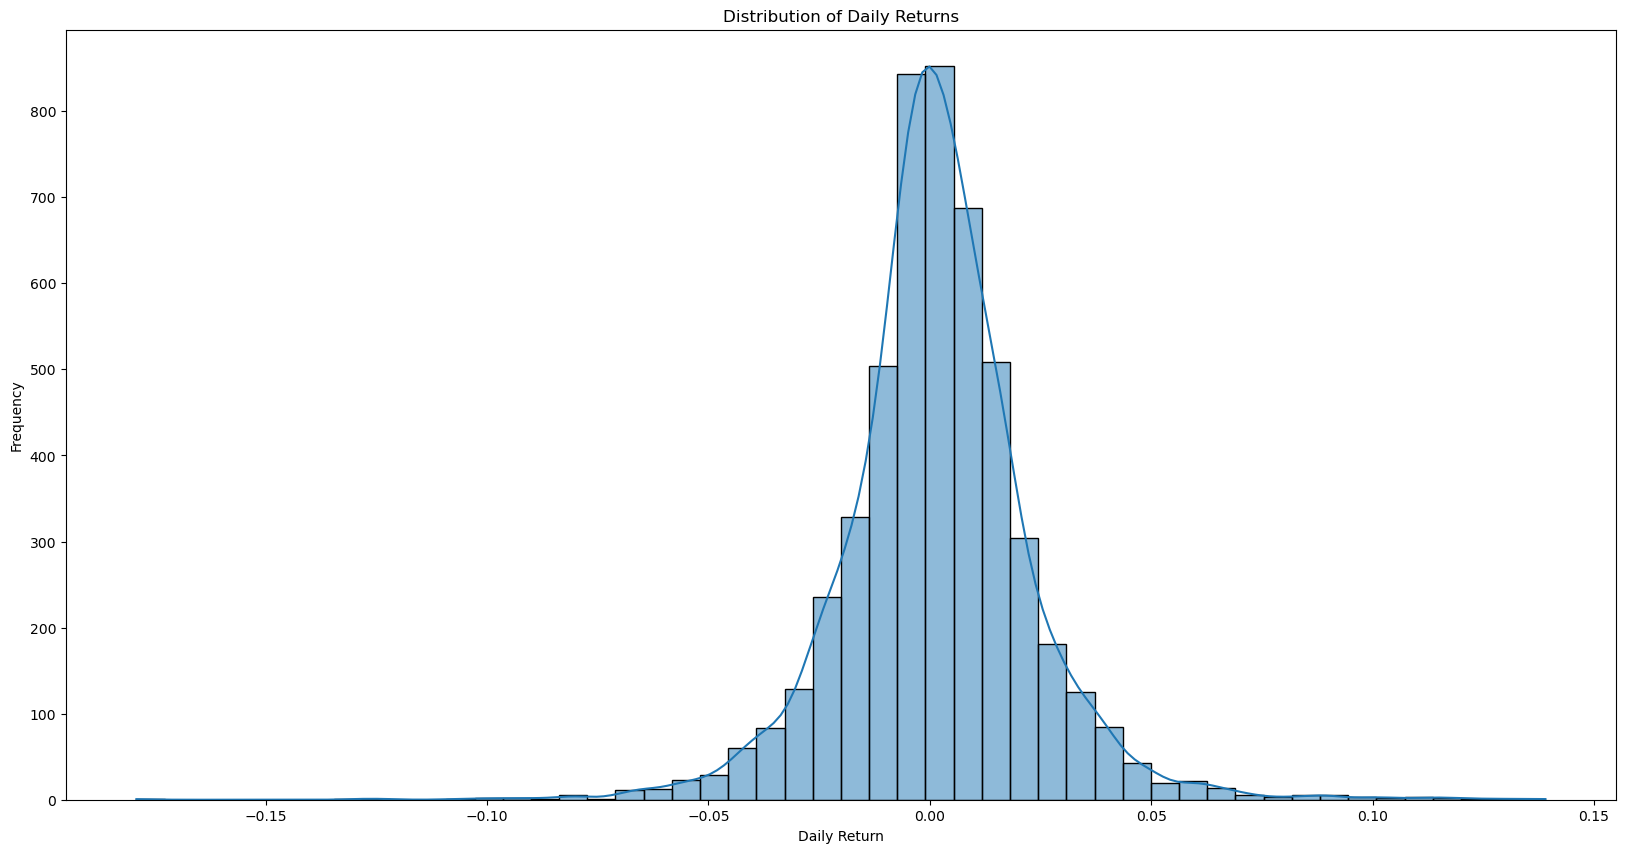

In [15]:
plt.figure(figsize=(20, 10))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [10]:
window = 30
df['Rolling_Mean'] = df['Close'].rolling(window).mean()
df['Rolling_Std'] = df['Close'].rolling(window).std()

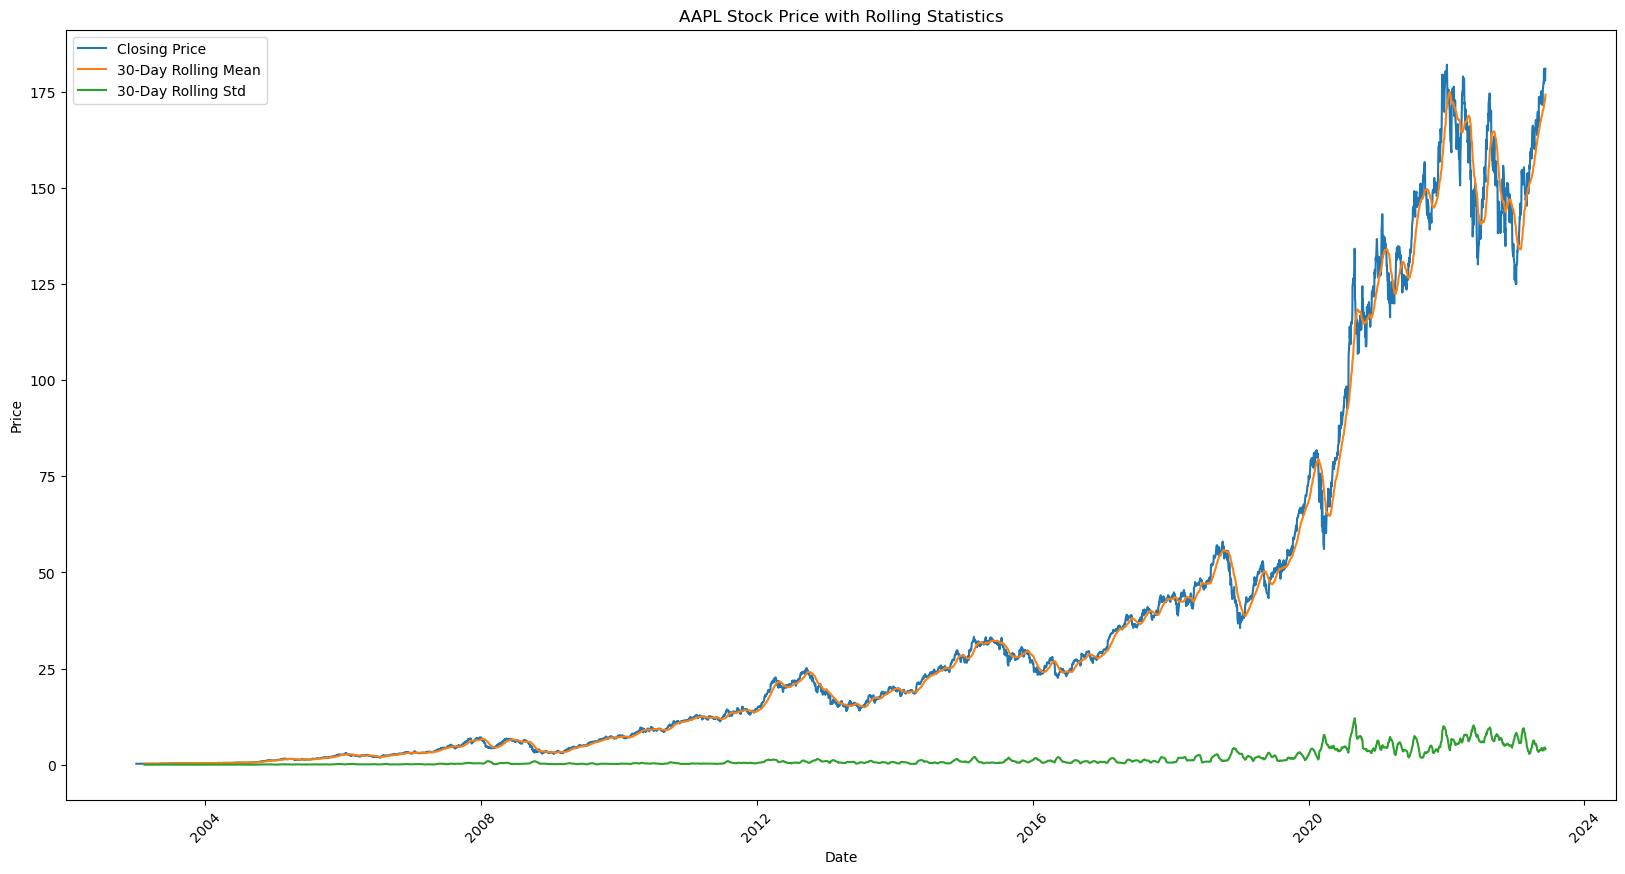

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['Rolling_Mean'], label=f'{window}-Day Rolling Mean')
plt.plot(df['Date'], df['Rolling_Std'], label=f'{window}-Day Rolling Std')
plt.title('AAPL Stock Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

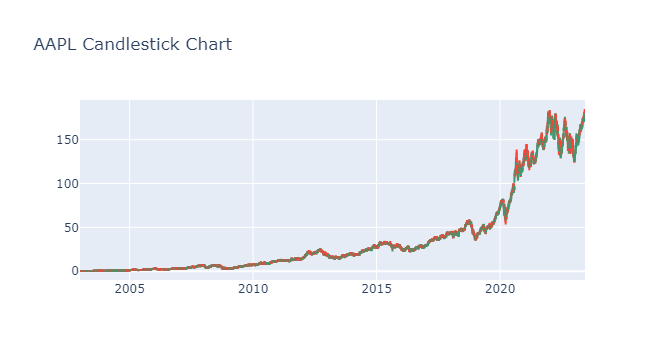

In [14]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  xaxis_rangeslider_visible=False)

fig.show()